In [43]:
import pandas as pd
import numpy as np
from sklearn import datasets,ensemble

import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler

In [44]:
X,y = datasets.load_diabetes(return_X_y=True)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [46]:
from torch.utils.data import TensorDataset,DataLoader

x_train=torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

train_ds = TensorDataset(x_train, y_train)

torch.manual_seed(1)
batch_size = 10
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [47]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

In [56]:
x_train.size()

torch.Size([353, 10])

In [60]:
input_size = x_train.size(-1)
hidden_size = 50
output_size = y_train.size(-1)
model = Model(input_size, hidden_size, output_size)

In [61]:
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [65]:
num_epochs = 1000
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch) # generate predictions
        loss = loss_fn(pred, y_batch) # Calculate loss
        loss.backward() # Compute gradients
        optimizer.step() # Update parameters using gradients
        optimizer.zero_grad() #Reset the gradients to zero
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.mean()
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

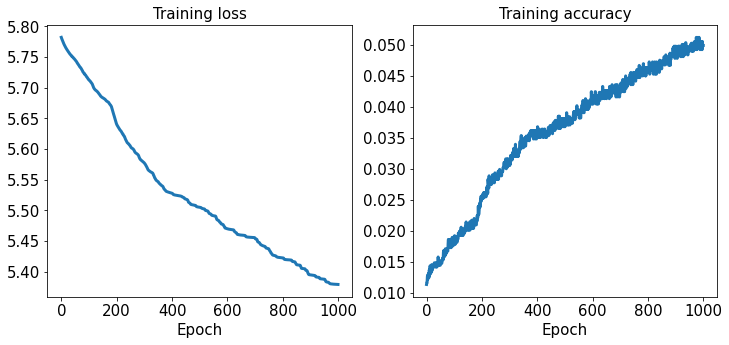

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [67]:
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val) 
pred_test = model(x_val)
correct = (torch.argmax(pred_test, dim=1) == y_val).float()
accuracy = correct.mean()
print(f'Test Acc.: {accuracy:.4f}')

TypeError: expected np.ndarray (got Tensor)

In [ ]:
from torch.utils.data import DataLoader,Dataset
class Data(Dataset):
    def __init__(self):#data loading,reading
        self.x=torch.from_numpy(x_train)
        self.y=torch.from_numpy(y_train).type(torch.LongTensor)
        self.len=self.x.shape[0]
    def __getitem__(self,index): #indexing dataset    
        return self.x[index], self.y[index]
    def __len__(self):#len(dataset)
        return self.len

In [ ]:
# Batch :  

data_set=Data()
trainloader=DataLoader(dataset=data_set,batch_size=64)#num workers azaldıkça hız arttı.

In [ ]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self,D_in,H1,H2,D_out):
        super(MLP,self).__init__()
        self.linear1=nn.Linear(D_in,H1)
        self.linear2=nn.Linear(H1,H2)
        self.linear3=nn.Linear(H2,D_out)

        
    def forward(self,x): #Every nn.Module subclass implements the operations on input data in the forward method.
        #bu kısım x veri setiyle yukarıdaki katmanları çalıştırmaktadır.
        x=F.relu(self.linear1(x)) 
        x=F.relu(self.linear2(x)) #relu belli bir değerden aşağısını yok sayıp yukarısını aynen döndürür.
        x=self.linear3(x)
        return x

In [ ]:
input_dim=10     # how many Variables are in the dataset
hidden_dim1 = 25
hidden_dim2 = 5 # hidden layers
output_dim=442  # number of classes

model=MLP(input_dim,hidden_dim1,hidden_dim2,output_dim)

In [ ]:
criterion=nn.MSELoss()
learning_rate=0.1
optimizer=torch.optim.Adam(model.parameters(), lr=learning_rate) #SGB optimizerla bunun farkı ne?

In [ ]:
n_epochs=1000
loss_list=[]


#Training loop
#n_epochs
for epoch in range(n_epochs):
    for x, y in trainloader:
      

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        y_pred=model(x)
        # calculate loss, da Cross Entropy benutzt wird muss ich in den loss Klassen vorhersagen, 
        # also Wahrscheinlichkeit pro Klasse. Das mach torch.max(y,1)[1])
        loss=criterion(y_pred,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        loss_list.append(loss.data)
        
        
        print('epoch {}, loss {}'.format(epoch, loss.item()))

/root/.local/share/virtualenvs/machine-learning-3gRytY6Y/lib/python3.9/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 442])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (442) must match the size of tensor b (64) at non-singleton dimension 1